# Common import and setup


In [1]:
import os, sys, time, pytest

import matplotlib.pyplot as plt
from matplotlib import patches, lines
import numpy as np
import pandas as pd
from pandas.testing import assert_frame_equal

import pdfminer

from IPython.display import display

# Make sure we use the local version of camelot if it is here
sys.path.insert(0, os.path.abspath(''))

import camelot
from camelot.core import Table, TableList, TextEdges
from camelot.__version__ import generate_version
from camelot.utils import get_text_objects, text_in_bbox
from camelot.parsers.stream import Stream
from camelot.parsers.network import Network
from camelot.handlers import PDFHandler
from camelot.plotting import draw_pdf
from tests.data import *

testdir = os.path.dirname(os.path.abspath('.'))
testdir = os.path.join(testdir, "camelot/tests/files")

# To check which library we're using
camelot.__file__


'/Users/francoishuet/Code/camelot/camelot/__init__.py'

In [2]:
kwargs = {}
data = None
# pdf_file = "vertical_header.pdf"
# pdf_file, kwargs, data = "superscript.pdf", {"flag_size": True}, data_stream_flag_size # test_network_flag_size
# pdf_file = "health.pdf"  # test_network
# pdf_file = "clockwise_table_2.pdf"
# pdf_file = "tabula/12s0324.pdf" # interesting because contains two separate tables
# pdf_file = "clockwise_table_2.pdf"  # test_network_table_rotated / test_stream_table_rotated
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_regions": ["320,335,573,505"]} # test_network_table_regions
# pdf_file, kwargs = "detect_vertical_false.pdf", {"strip_text": " ,\n"}  # data_stream_strip_text
# pdf_file, kwargs, data = "tabula/m27.pdf", {"columns": ["72,95,209,327,442,529,566,606,683"], "split_text": True, }, data_stream_split_text  # data_stream_split_text
pdf_file = "vertical_header.pdf"
# pdf_file, kwargs = "vertical_header.pdf", {"pages": "2"}
# pdf_file, kwargs = "PIR_Prospetto.dOfferta.pdf", {"pages": "6"}
# pdf_file = "twotables_2.pdf"
# pdf_file = "camelot-issue-132-multiple-tables.pdf"
# pdf_file, kwargs, data = "edge_tol.pdf", {"edge_tol": 500}, data_stream_edge_tol
# pdf_file, kwargs, data = "edge_tol.pdf", {}, data_stream_edge_tol
# pdf_file, kwargs = "tabula/icdar2013-dataset/competition-dataset-us/us-030.pdf", {"pages": "2"}  # test_lattice
# pdf_file, kwargs = "background_lines_1.pdf", {} # {"process_background": True}  # test_lattice_process_background

filename = os.path.join(testdir, pdf_file)

Showing table #0 found by stream:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Alcona,Abdul El-Sayed\n15,Shri Thanedar\n28,Gretchen Whitmer\n80,Debbie Stabenow\n117,,Joe Weir\n106,Lora Greene\n94,"John E. Norton, III\n17",,,,,,,
1,Caledonia,5,15,68,85,,73,69,10,,,,,,,
2,Curtis,21,22,90,126,,112,77,31,,,,,,,
3,Greenbush,19,35,93,136,,123,112,18,,,,,,,
4,Gustin,0,10,27,32,,30,26,10,,,,,,,
5,Harrisville,19,20,93,126,,109,116,6,,,,,,,
6,Hawes,8,11,46,62,,53,45,7,,,,,,,
7,Haynes,11,9,48,66,,62,60,8,,,,,,,
8,Mikado,6,4,32,40,,35,32,7,,,,,,,
9,Millen,10,8,36,47,,40,41,3,,,,,,,


Showing table #0 found by lattice:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,STATE,,,CONGRESSIONAL,,,,LEGISLATIVE,,,,County,,County Commissioner,,,,
1,Governor,,,U.S. Senator,,Rep. 1st. Dist,,36th District,,106th District,,ROD,Road \nCom,,Dist #1 Dist #2 Dist #3 Dist #4 Dist #5,,,
2,Abdul El-Sayed,Shri Thanedar,Gretchen Whitmer,Debbie Stabenow,,,,Joe Weir,,Lora Greene,"John E. Norton, III",,,,,,,
3,15,28,80,117,,,,106,,94,17,,,,,,,
4,,,,,,,,,,,,,,,,,,
5,5\n15\n68,,,85,,,,73,,69\n10,,,,,,,,
6,,,,,,,,,,,,,,,,,,
7,21\n22\n90,,,126,,,,112,,77\n31,,,,,,,,
8,,,,,,,,,,,,,,,,,,
9,19\n35\n93,,,136,,,,123,,112\n18,,,,,,,,


Showing table #0 found by network:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,,Abdul El-Sayed,Shri Thanedar,Gretchen Whitmer,Debbie Stabenow,,Joe Weir,Lora Greene,"John E. Norton, III",,,,,
1,Alcona,15,28,80,117,,106,94,17,,,,,
2,Caledonia,5,15,68,85,,73,69,10,,,,,
3,Curtis,21,22,90,126,,112,77,31,,,,,
4,Greenbush,19,35,93,136,,123,112,18,,,,,
5,Gustin,0,10,27,32,,30,26,10,,,,,
6,Harrisville,19,20,93,126,,109,116,6,,,,,
7,Hawes,8,11,46,62,,53,45,7,,,,,
8,Haynes,11,9,48,66,,62,60,8,,,,,
9,Mikado,6,4,32,40,,35,32,7,,,,,


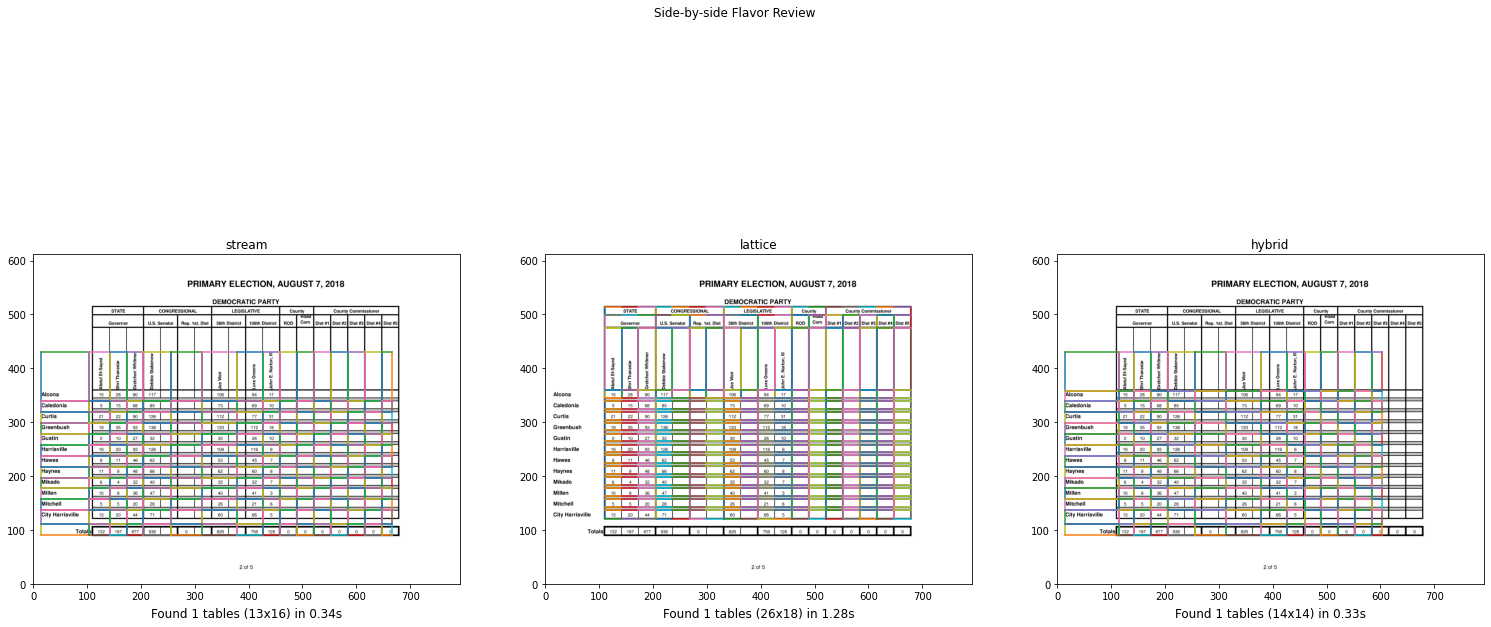

In [3]:

# Set up plots to be large enough for visualization
plt.rcParams["figure.figsize"] = [26, 12]
fig, axes = plt.subplots(1, 3)
fig.suptitle('Side-by-side Flavor Review')
tables_list = []
for idx, flavor in enumerate(["stream", "lattice", "network"]):
    timer_before_parse = time.perf_counter()
    tables = camelot.read_pdf(filename, flavor=flavor, debug=True, **kwargs)
    tables_list.append(tables)
    timer_after_parse = time.perf_counter()
    ax = axes[idx]
    for idx_table, table in enumerate(tables):
        print("Showing table #{idx} found by {flavor}:".format(idx=idx_table, flavor=flavor))
        display(table.df)
        fig = camelot.plot(table, kind='grid', ax=ax)
    ax.set_title("{flavor}".format(flavor=flavor))
    tables_dims = ", ".join(
        map(
            lambda table: "{rows}x{cols}".format(
                rows=table.shape[0],
                cols=table.shape[1],
            ), tables
        )
    )
    ax.text(
        0.5,-0.1, 
        "Found {table_num} tables ({tables_dims}) in {parse_time:.2f}s".format(
            table_num=len(tables),
            tables_dims=tables_dims,
            parse_time=timer_after_parse - timer_before_parse,
        ), 
        size=12, ha="center", 
        transform=ax.transAxes
    )
    timer_after_plot = time.perf_counter()
fig